# Feature Identification in Tokomak

This is a demo notebook covering the basic identification of features in a 2D slice of a tokomak. This method is not heavily refined, and individual paramaters may be changed below to see new or different variations of the features. However, it does succeed in identifying main features, which was the goal of this work. 

This is a test to make sure that OpenCV is working, and to check which version is present. 

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.9.1 


Import the headers that I want to use again, just for fun (since I need a few extras)

In [2]:
import sys
import numpy as np
import argparse
import glob
import cv2
import time
from matplotlib import pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

Define a few functions that will be needed, and display the image we are performing feature identification on, prior to any modification. 

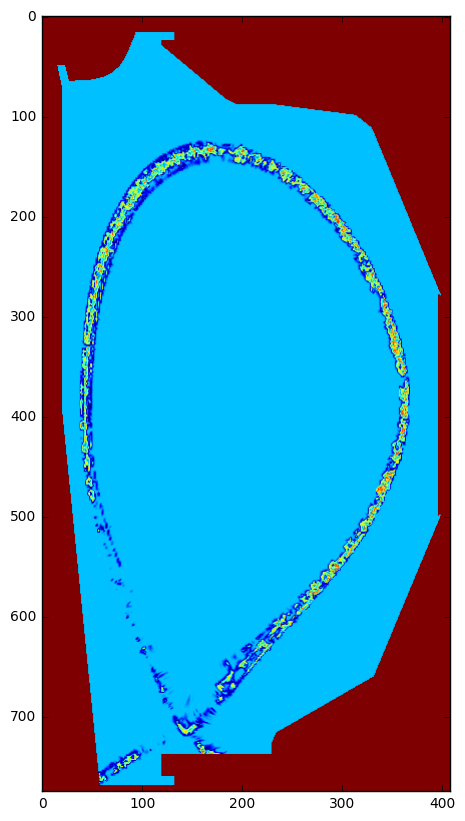

In [3]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged

def test(threshTest):
    ret,thresh6 = cv2.threshold(thresh5,
                                threshTest,
                                255,
                                cv2.THRESH_TOZERO_INV
                               )
    cv2.imshow('Threshold',thresh6)


def CannyThreshold(lowThreshold):
    detected_edges = cv2.GaussianBlur(thresh5,(3,3),0)
    detected_edges = cv2.Canny(detected_edges,
                               lowThreshold,
                               lowThreshold*ratio,
                               apertureSize = kernel_size
                              )
    cv2.imshow('Canny Threshold',detected_edges)

threshTest = 0
lowThreshold = 0
max_lowThreshold = 100
ratio = 3
kernel_size = 3

img3 = cv2.imread('vdxb2.png', 0)
ax3 = plt.figure(figsize = (10,10))
plt.imshow(img3)


Perform an initial threshold. These values were chosen based on values from the simulation. 

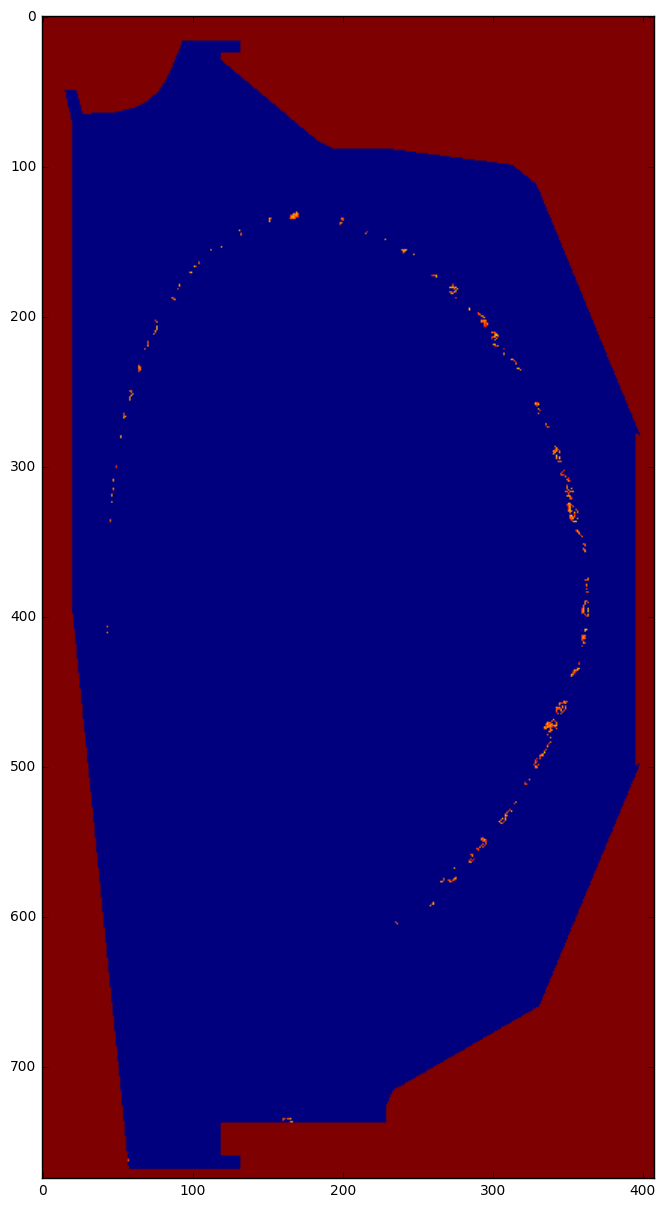

In [4]:
def f(x, y):
    ret,thresh5 = cv2.threshold(img3,x,y,cv2.THRESH_TOZERO)
    ax3 = plt.figure(figsize = (15,15))
    return plt.imshow(thresh5)
w = interactive(f, 
                x=widgets.IntSlider(min=150,max=200,step=1,value=179),
                y=widgets.IntSlider(min=225,max=275,step=1,value=255)
               );
w



Perform a second threshold to remove the boundary of the tokomak, since this is really not a feature.

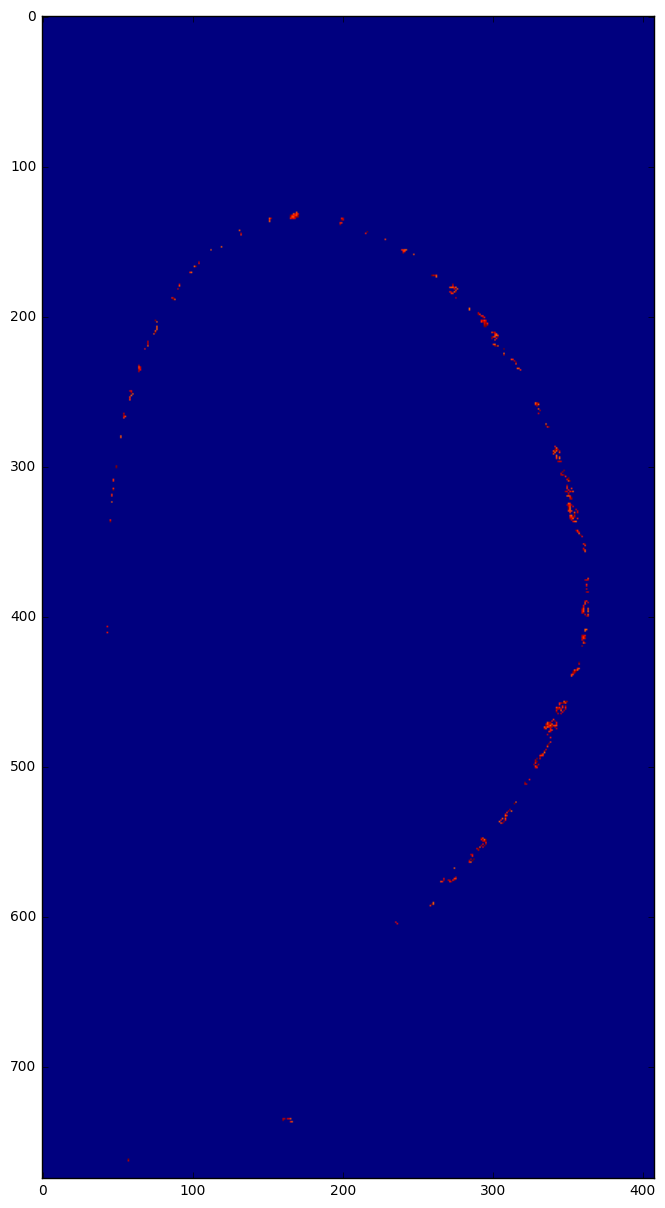

In [5]:
def f(x, y):
    ret,thresh5 = cv2.threshold(img3,179,255,cv2.THRESH_TOZERO)
    ret,thresh6 = cv2.threshold(thresh5,x,y,cv2.THRESH_TOZERO_INV)
    ax3 = plt.figure(figsize = (15,15))
    return plt.imshow(thresh6)
w = interactive(f, 
                x=widgets.IntSlider(min=225,max=275,step=1,value=254),
                y=widgets.IntSlider(min=225,max=275,step=1,value=255)
               );
w

Berform a blur to join some of the smaller disjoint features to larger features, followed by a contour finding algorithm. This helps to identify prominant features which more closely resemble what a human eye would define as a feature. 

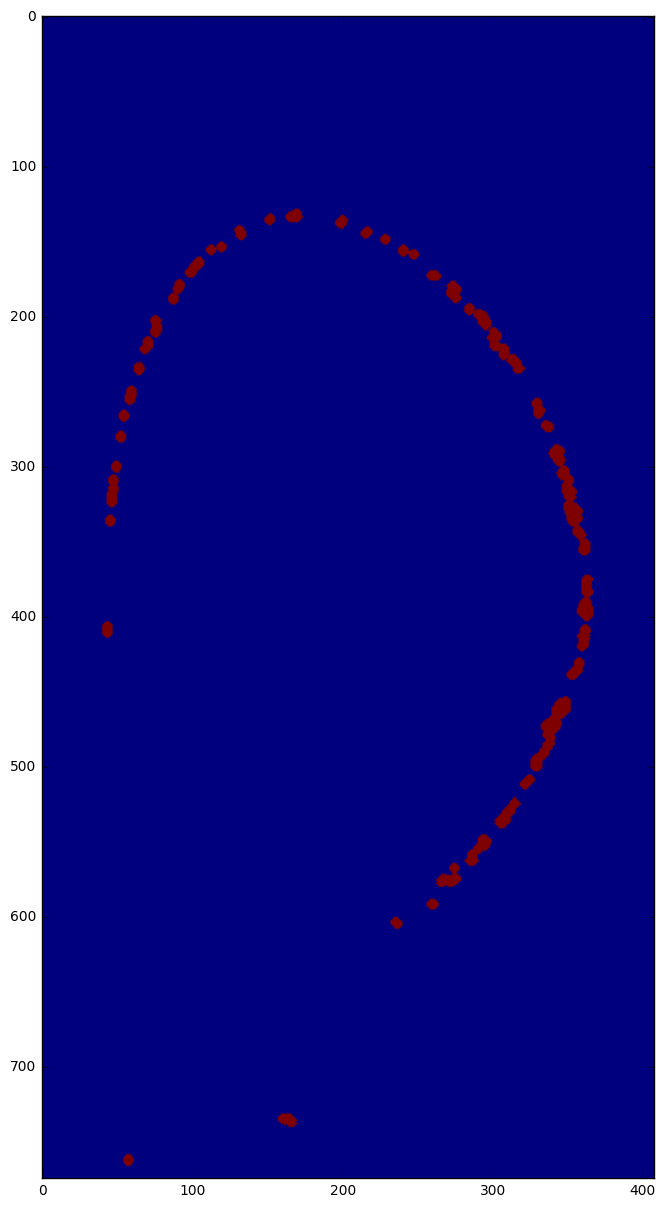

In [6]:
    ret,thresh5 = cv2.threshold(img3,179,255,cv2.THRESH_TOZERO)
    ret,thresh6 = cv2.threshold(thresh5,254,255,cv2.THRESH_TOZERO_INV)
blurred = cv2.GaussianBlur(thresh6, (3, 3), 0)
auto = auto_canny(blurred)

(cnts, _) = cv2.findContours(auto, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(thresh6, cnts, -1, (255, 0, 0), 3)
ax3 = plt.figure(figsize = (15,15))
plt.imshow(thresh6)